In [54]:
import pandas as pd
import numpy  as np

In [55]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

In [56]:
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [57]:
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar     = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar     = dados_azar["vendido"]

dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [58]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

In [59]:
espaco_parametros = {
  'max_depth':         [3, 4],
  'min_samples_leaf':  [32, 64, 128],
  'min_samples_split': [32, 64, 128],
  'criterion':         ['gini', 'entropy']
}

In [60]:
busca = GridSearchCV(
  estimator=DecisionTreeClassifier(),
  param_grid=espaco_parametros,
  cv=KFold(n_splits=10, shuffle=True)
)

busca.fit(x_azar, y_azar)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'min_samples_leaf': [32, 64, 128],
                         'min_samples_split': [32, 64, 128]})

In [61]:
scores = cross_val_score(
  estimator=busca,
  X=x_azar,
  y=y_azar,
  cv=KFold(n_splits=10, shuffle=True)
)

In [62]:
def imprime_scores(scores):
  media  = scores.mean() * 100
  desvio = scores.std()  * 100

  print("Acc média %.2f" % media, end=", ")
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio), end=", ")

imprime_scores(scores)

Acc média 78.69, Intervalo [76.13, 81.25], 

In [63]:
melhor_modelo = busca.best_estimator_

melhor_modelo

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [64]:
import graphviz

from sklearn.tree import export_graphviz

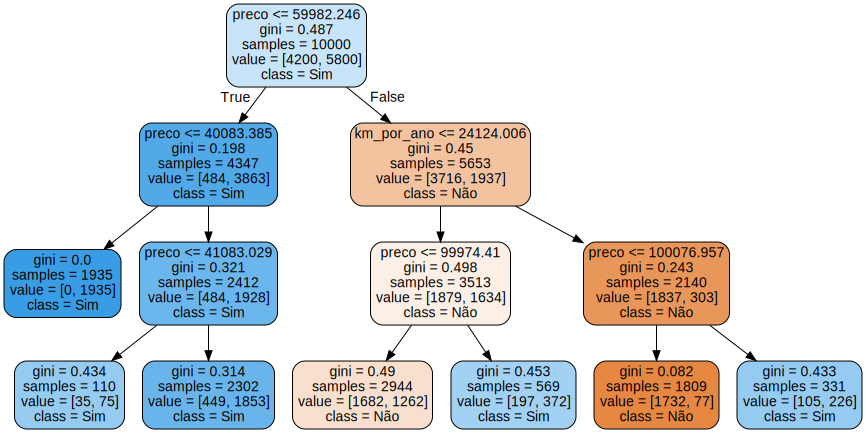

In [65]:
features = x_azar.columns

dot_data = export_graphviz(
  melhor_modelo,
  out_file=None,
  filled=True,
  rounded=True,
  class_names=['Não', 'Sim'],
  feature_names=features
)

graph = graphviz.Source(dot_data)

graph

# Busca Aleatória

In [66]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)

In [67]:
espaco_parametros = {
  'max_depth'        : [3, 4],
  'min_samples_leaf' : [32, 64, 128],
  'min_samples_split': [32, 64, 128],
  'criterion'        : ['gini', 'entropy']
}

In [68]:
busca = RandomizedSearchCV(
  estimator=DecisionTreeClassifier(),
  param_distributions=espaco_parametros,
  cv=KFold(n_splits=10, shuffle=True),
  n_iter=16,
  random_state=SEED
)

busca.fit(x_azar, y_azar)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=16,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4],
                                        'min_samples_leaf': [32, 64, 128],
                                        'min_samples_split': [32, 64, 128]},
                   random_state=301)

In [69]:
resultados = pd.DataFrame(busca.cv_results_)

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018769,0.002203,0.002599,0.000305,128,128,4,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
1,0.015736,0.000645,0.002437,0.000475,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
2,0.015665,0.000316,0.002547,0.000670,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
3,0.023368,0.000931,0.002465,0.000494,32,64,4,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
4,0.022607,0.001047,0.002488,0.000494,64,64,4,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1


In [70]:
scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=10, shuffle=True))

scores

array([0.775, 0.798, 0.79 , 0.785, 0.785, 0.783, 0.772, 0.778, 0.818,
       0.785])

In [71]:
imprime_scores(scores)

Acc média 78.69, Intervalo [76.18, 81.20], 

In [72]:
melhor_modelo = busca.best_estimator_

print(melhor_modelo)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=128, min_samples_split=128)


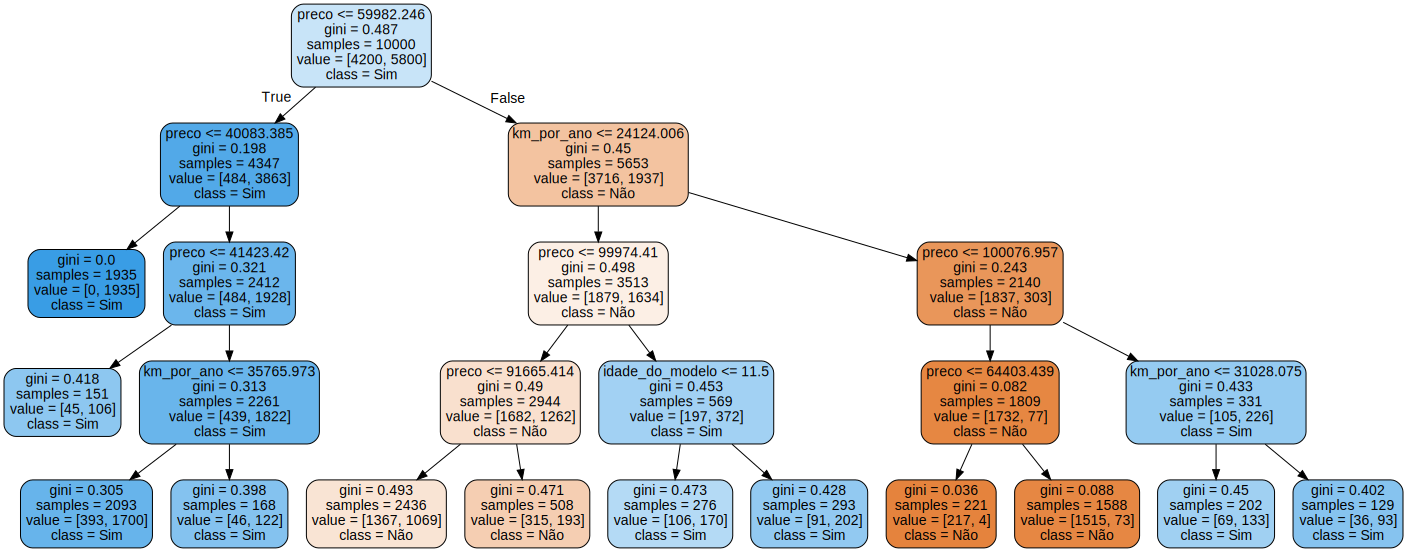

In [73]:
features = x_azar.columns

dot_data = export_graphviz(
  melhor_modelo,
  out_file=None,
  filled=True,
  rounded=True,
  class_names=['Não', 'Sim'],
  feature_names=features
)

graph = graphviz.Source(dot_data)

graph

# Customizando espaço de hiperparâmetros

In [74]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)

In [75]:
from scipy.stats import randint

espaco_parametros = {
  'max_depth'        : [3, 4, 5, 10, 15, 20, 30, None],
  'min_samples_leaf' : randint(32, 128),
  'min_samples_split': randint(32, 128),
  'criterion'        : ['gini', 'entropy']
}

In [76]:
busca = RandomizedSearchCV(
  estimator=DecisionTreeClassifier(),
  param_distributions=espaco_parametros,
  cv=KFold(n_splits=10, shuffle=True),
  n_iter=16,
  random_state=SEED
)

busca.fit(x_azar, y_azar)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=16,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 10, 15, 20, 30,
                                                      None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5c6741bfd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5c68cf7430>},
                   random_state=301)

In [77]:
scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=10, shuffle=True))

imprime_scores(scores)

Acc média 78.69, Intervalo [76.18, 81.20], 

In [78]:
resultados = pd.DataFrame(busca.cv_results_)

resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)

In [79]:
for idx, row in resultados_ordenados_pela_media.iterrows():
  print(f"{row['mean_test_score']:.4f}", row['params'])

0.7870 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.7870 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.7870 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.7855 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.7852 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.7832 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.7826 {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.7807 {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 74, 'min_samples_split': 58}
0.7804 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 104, 'min_samples_split': 88}
0.7802 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 88, 'min_samples_split': 78}
0.7796 {'criterion': 'gini', 'max_de

In [80]:
espaco_parametros = {
  'max_depth'        : [3, 4, 5, 10, 15, 20, 30, None],
  'min_samples_leaf' : randint(32, 128),
  'min_samples_split': randint(32, 128),
  'criterion'        : ['gini', 'entropy']
}

busca = RandomizedSearchCV(
  estimator=DecisionTreeClassifier(),
  param_distributions=espaco_parametros,
  cv=KFold(n_splits=10, shuffle=True),
  n_iter=64,
  random_state=SEED
)

busca.fit(x_azar, y_azar)

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=10, shuffle=True))

imprime_scores(scores)

Acc média 78.69, Intervalo [76.91, 80.47], 

In [81]:
resultados = pd.DataFrame(busca.cv_results_)

resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)

for idx, row in resultados_ordenados_pela_media.iterrows():
  print(f"{row['mean_test_score']:.4f}", row['params'])

0.7870 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.7870 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.7870 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 56, 'min_samples_split': 54}
0.7870 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 45, 'min_samples_split': 103}
0.7870 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.7870 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.7870 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.7870 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 74, 'min_samples_split': 55}
0.7870 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 88, 'min_samples_split': 96}
0.7870 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 101, 'min_samples_split': 95}
0.7870 {'criterion': 'gini', 'max_depth': 4,

# Comparando GridSearchCV com RandomizedSearch

In [82]:
from sklearn.ensemble import RandomForestClassifier
import time

In [83]:
espaco_parametros = {
  'n_estimators'     : [10],
  'max_depth'        : [3, 4],
  'min_samples_leaf' : [32, 68],
  'min_samples_split': [32, 64],
  'bootstrap'        : [True, False],
  'criterion'        : ['gini', 'entropy']
}

tic = time.time()

busca = GridSearchCV(
  estimator=RandomForestClassifier(),
  param_grid=espaco_parametros,
  cv=KFold(n_splits=5, shuffle=True)
)

busca.fit(x_azar, y_azar)

tac = time.time()

print(f"Tempo de espera: {tac - tic}")

tic = time.time()

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))

tac = time.time()

print(f"Tempo de espera: {tac - tic}")

imprime_scores(scores)

Tempo de espera: 10.732621908187866
Tempo de espera: 49.13162350654602
Acc média 77.10, Intervalo [74.22, 79.98], 

In [84]:
resultados = pd.DataFrame(busca.cv_results_)

resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)

for idx, row in resultados_ordenados_pela_media[:5].iterrows():
  print(f"{row['mean_test_score']:.4f}", row['params'])

0.7821 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.7761 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 68, 'min_samples_split': 32, 'n_estimators': 10}
0.7752 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 68, 'min_samples_split': 64, 'n_estimators': 10}
0.7740 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 68, 'min_samples_split': 32, 'n_estimators': 10}
0.7733 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}


In [85]:
espaco_parametros = {
  'n_estimators'     : [10],
  'max_depth'        : [3, 4],
  'min_samples_leaf' : [32, 68],
  'min_samples_split': [32, 64],
  'bootstrap'        : [True, False],
  'criterion'        : ['gini', 'entropy']
}

tic = time.time()

busca = RandomizedSearchCV(
  estimator=RandomForestClassifier(),
  param_distributions=espaco_parametros,
  cv=KFold(n_splits=5, shuffle=True),
  n_iter=20,
  random_state=SEED
)

busca.fit(x_azar, y_azar)

tac = time.time()

print(f"Tempo de espera: {tac - tic}")

tic = time.time()

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))

tac = time.time()

print(f"Tempo de espera: {tac - tic}")

imprime_scores(scores)

Tempo de espera: 8.060567378997803
Tempo de espera: 34.128549098968506
Acc média 76.43, Intervalo [73.26, 79.60], 

In [86]:
resultados = pd.DataFrame(busca.cv_results_)

resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)

for idx, row in resultados_ordenados_pela_media[:5].iterrows():
  print(f"{row['mean_test_score']:.4f}", row['params'])

0.7770 {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 68, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}
0.7767 {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 68, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': False}
0.7763 {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}
0.7762 {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 68, 'max_depth': 4, 'criterion': 'entropy', 'bootstrap': False}
0.7758 {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 68, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': True}


In [87]:
espaco_parametros = {
  'n_estimators'     : randint(10, 101),
  'max_depth'        : randint(3, 6),
  'min_samples_leaf' : randint(32, 129),
  'min_samples_split': randint(32, 129),
  'bootstrap'        : [True, False],
  'criterion'        : ['gini', 'entropy']
}

tic = time.time()

busca = RandomizedSearchCV(
  estimator=RandomForestClassifier(),
  param_distributions=espaco_parametros,
  cv=KFold(n_splits=5, shuffle=True),
  n_iter=80,
  random_state=SEED
)

busca.fit(x_azar, y_azar)

tac = time.time()

print(f"Tempo de espera: {tac - tic}")

tic = time.time()

scores = cross_val_score(busca, x_azar, y_azar, cv=KFold(n_splits=5, shuffle=True))

tac = time.time()

print(f"Tempo de espera: {tac - tic}")

imprime_scores(scores)

Tempo de espera: 247.99050402641296
Tempo de espera: 943.7228996753693
Acc média 77.85, Intervalo [77.33, 78.37], 